<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-Learning/blob/main/ML75dayschallenhe4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ABC company.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [59]:
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [60]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [61]:
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,0


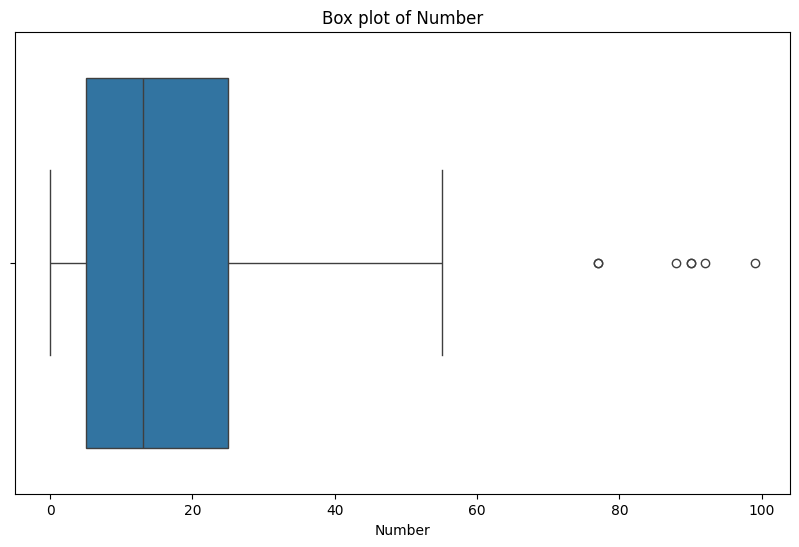

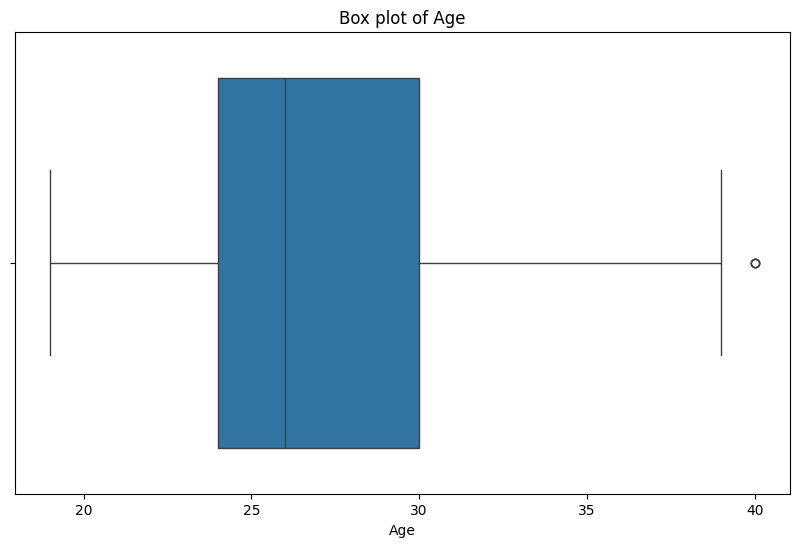

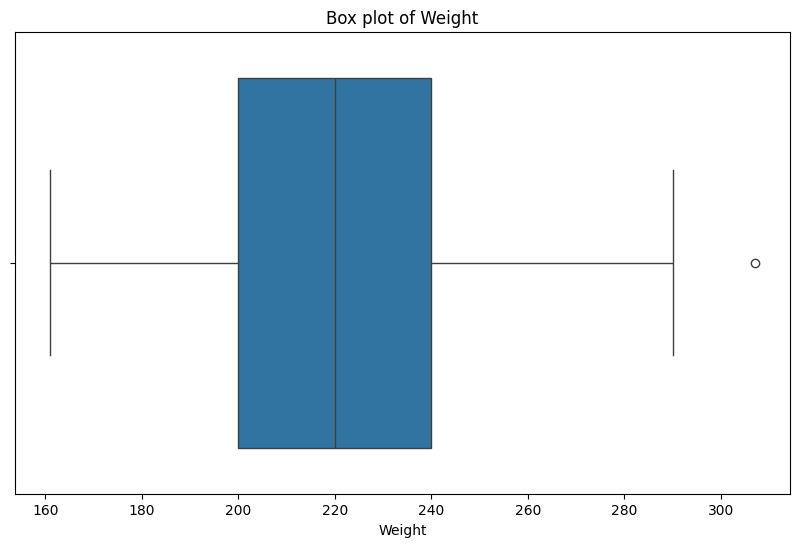

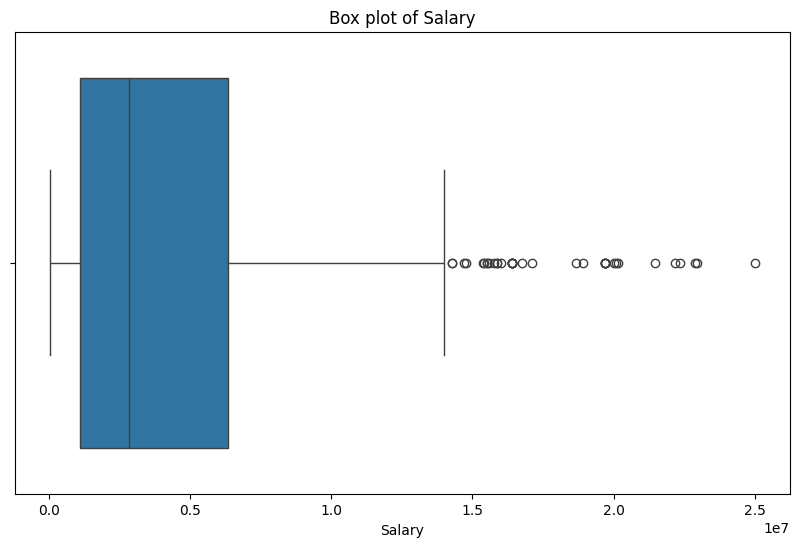

In [92]:
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()

In [63]:
outliers = {}

In [117]:
for col in numeric_columns:
  Q1 = df['Age'].quantile(0.25)
  Q3 = df['Age'].quantile(0.75)
  IQR = Q3 - Q1



print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("LOWER BOUND",lower_bound)
print("UPPER BOUND",upper_bound)



Q1 24.0
Q3 30.0
IQR 6.0
LOWER BOUND 15.0
UPPER BOUND 39.0


<Axes: ylabel='Age'>

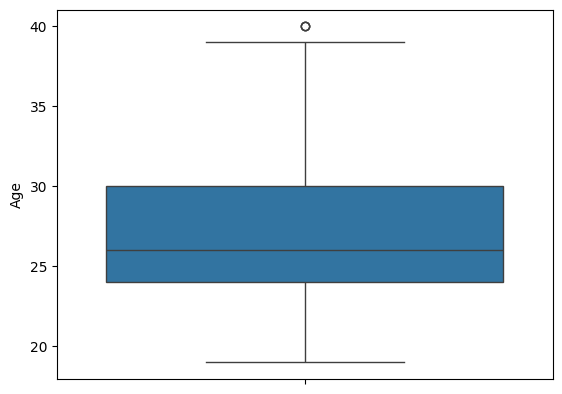

In [75]:
sns.boxplot(df['Age'])

In [78]:
#find outliers
df.loc[(df['Age']> upper_bound) | (df['Age']<lower_bound)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
298,Tim Duncan,San Antonio Spurs,21,C,40,06-Nov,250,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24,PG,40,06-Mar,200,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21,PF,40,06-Nov,240,NaN,8500000.0


In [83]:
#trimming- delete the outlier data
new_df = df.loc[(df['Age']< upper_bound) & (df['Age']>lower_bound)]
print("Before removing outliers:",len(df))
print("After removing outliers:",len(new_df))
print("outliers:",len(df)-len(new_df))

Before removing outliers: 458
After removing outliers: 453
outliers: 5


<Axes: ylabel='Age'>

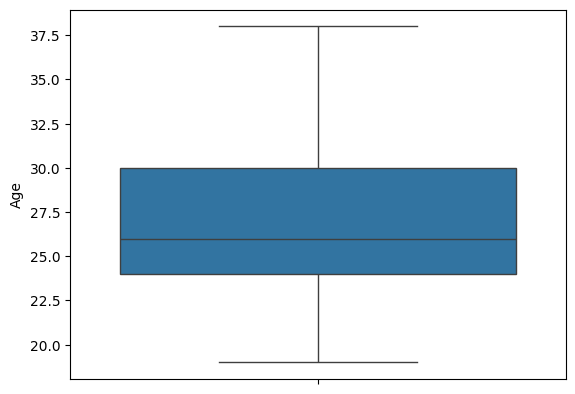

In [84]:
sns.boxplot(new_df['Age'])

In [88]:
#capping - change the outlier value to upper (or)  lower limit values
new_df = df.copy()
new_df.loc[(new_df['Age']>upper_bound),'Age']=upper_bound
new_df.loc[(new_df['Age']<lower_bound),'Age']=lower_bound

<Axes: ylabel='Age'>

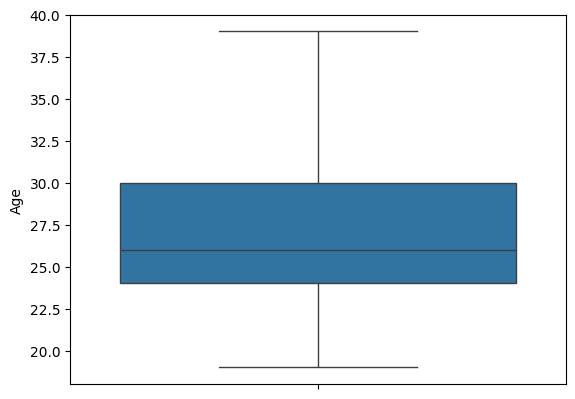

In [86]:
sns.boxplot(new_df['Age'])

#Salary

In [98]:
for col in numeric_columns:
  Q1 = df['Salary'].quantile(0.25)
  Q3 = df['Salary'].quantile(0.75)
  IQR = Q3 - Q1

print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("LOWER BOUND",lower_bound)
print("UPPER BOUND",upper_bound)


Q1 1100150.5
Q3 6323553.0
IQR 5223402.5
LOWER BOUND -6734953.25
UPPER BOUND 14158656.75


<Axes: ylabel='Salary'>

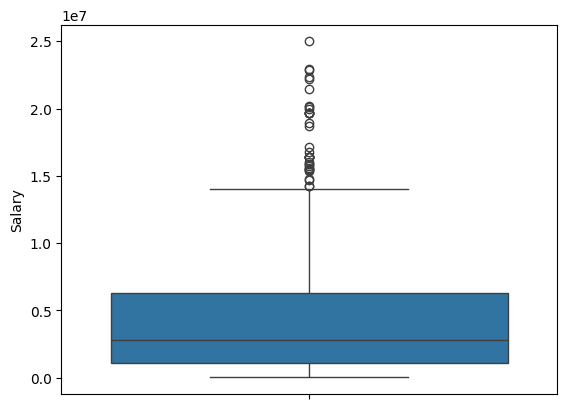

In [96]:
sns.boxplot(df['Salary'])

In [99]:
#find outliers
df.loc[(df['Salary']> upper_bound) | (df['Salary']<lower_bound)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
23,Brook Lopez,Brooklyn Nets,11,C,28,7-0,275,Stanford,19689000.0
33,Carmelo Anthony,New York Knicks,7,SF,32,06-Aug,240,Syracuse,22875000.0
82,Draymond Green,Golden State Warriors,23,PF,26,06-Jul,230,Michigan State,14260870.0
89,Klay Thompson,Golden State Warriors,11,SG,26,06-Jul,215,Washington State,15501000.0
96,Blake Griffin,Los Angeles Clippers,32,PF,27,06-Oct,251,Oklahoma,18907726.0
98,DeAndre Jordan,Los Angeles Clippers,6,C,27,06-Nov,265,Texas A&M,19689000.0
100,Chris Paul,Los Angeles Clippers,3,PG,31,6-0,175,Wake Forest,21468695.0
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,06-Jun,212,NaN,25000000.0
111,Roy Hibbert,Los Angeles Lakers,17,C,29,07-Feb,270,Georgetown,15592217.0
143,DeMarcus Cousins,Sacramento Kings,15,C,25,06-Nov,270,Kentucky,15851950.0


In [103]:
#trimming- delete the outlier data
new_df = df.loc[(df['Salary']< upper_bound) & (df['Salary']>lower_bound)]
print("Before removing outliers:",len(df))
print("After removing outliers:",len(new_df))
print("outliers:",len(df)-len(new_df))

Before removing outliers: 458
After removing outliers: 421
outliers: 37


<Axes: ylabel='Salary'>

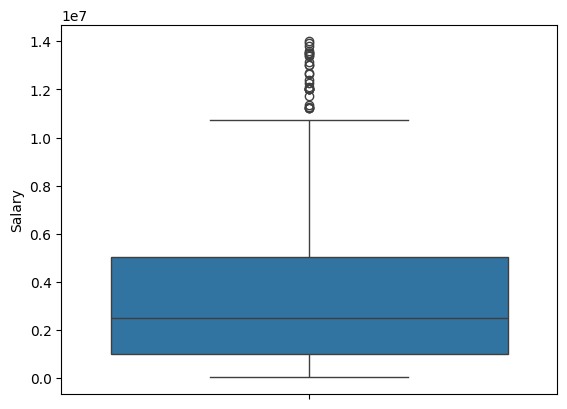

In [104]:
#trimming-boxplot
sns.boxplot(new_df['Salary'])

In [105]:
#capping - change the outlier value to upper (or)  lower limit values
new_df = df.copy()
new_df.loc[(new_df['Salary']>upper_bound),'Salary']=upper_bound
new_df.loc[(new_df['Salary']<lower_bound),'Salary']=lower_bound

<Axes: ylabel='Salary'>

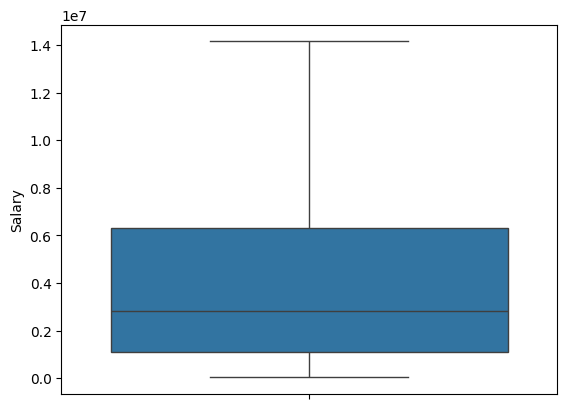

In [107]:
sns.boxplot(new_df['Salary'])

#Number

In [108]:
for col in numeric_columns:
  Q1 = df['Number'].quantile(0.25)
  Q3 = df['Number'].quantile(0.75)
  IQR = Q3 - Q1

print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("LOWER BOUND",lower_bound)
print("UPPER BOUND",upper_bound)

Q1 5.0
Q3 25.0
IQR 20.0
LOWER BOUND -25.0
UPPER BOUND 55.0


<Axes: ylabel='Number'>

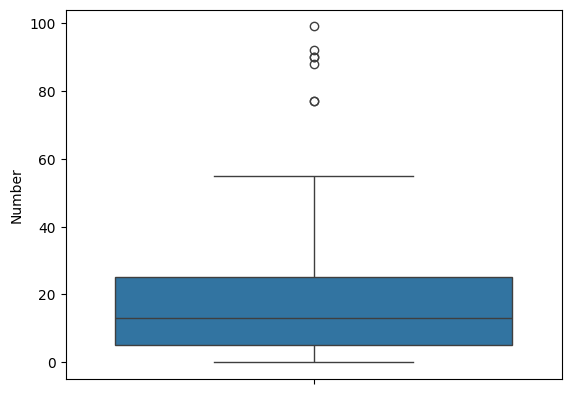

In [109]:
sns.boxplot(df['Number'])

In [110]:
#find outliers
df.loc[(df['Number']> upper_bound) | (df['Number']<lower_bound)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
68,Lucas Nogueira,Toronto Raptors,92,C,23,7-0,220,NaN,1842000.0
222,Johnny O'Bryant III,Milwaukee Bucks,77,PF,23,06-Sep,257,LSU,845059.0
372,Drew Gooden,Washington Wizards,90,PF,34,06-Oct,250,Kansas,3300000.0
391,Joffrey Lauvergne,Denver Nuggets,77,C,24,06-Nov,220,NaN,1709719.0
398,Nemanja Bjelica,Minnesota Timberwolves,88,PF,28,06-Oct,240,NaN,3950001.0


In [111]:
#trimming- delete the outlier data
new_df = df.loc[(df['Number']< upper_bound) & (df['Number']>lower_bound)]
print("Before removing outliers:",len(df))
print("After removing outliers:",len(new_df))
print("outliers:",len(df)-len(new_df))

Before removing outliers: 458
After removing outliers: 447
outliers: 11


<Axes: ylabel='Number'>

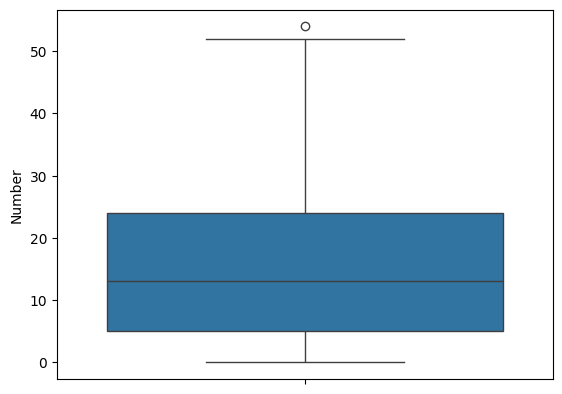

In [112]:
sns.boxplot(new_df['Number'])

In [113]:
#capping - change the outlier value to upper (or)  lower limit values
new_df = df.copy()
new_df.loc[(new_df['Number']>upper_bound),'Number']=upper_bound
new_df.loc[(new_df['Number']<lower_bound),'Number']=lower_bound

<Axes: ylabel='Number'>

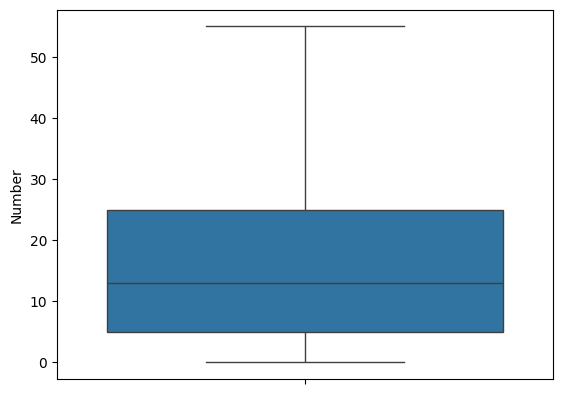

In [114]:
sns.boxplot(new_df['Number'])